# **Desafío 2. Modelo de regresion para estimar precio de propiedades**
## Análisis dataset de propiedades(Properati), basado en venta de propiedades
 ---
#### Integrantes
- Alejo Di Lelle
- Mariano Fernandez Ferreyra
- Martina Garcia
- Rafael Giordano
- Alejo Paulisich Bustelo

 ---

# **Objetivo del trabajo**
- Seleccionar los datos a modelar. Justificar esa selección.
- Entrenar al menos tres modelos de regresión lineal distintos sobre estos datos.
- Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.
- Determinar la importancia de las features incluidas en la predicción. Interpretar.


Enlace a la carpeta con los datasets:

https://1drv.ms/u/s!AuqBvU3gvHs_gS8PQJbGsB8_ehjf?e=9w1EOR 

# Librerias y lectura del dataset

In [3]:
#Estas son las librerias que vamos a utilizar para el analisis de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data\properati_limpio.csv', index_col='Unnamed: 0')

In [5]:
df.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,...,barrio,price_usd_per_m2,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,1093959.0,...,Mataderos,1127.272727,0,0,0,0,0,0,0,0
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,2646675.0,...,La Plata,NaN,0,1,0,0,0,0,0,1
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,1270404.0,...,Mataderos,1309.090909,0,0,0,0,0,0,0,0
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,USD,1676227.5,...,Liniers,NaN,0,0,0,0,0,0,0,0
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,64000.0,USD,1129248.0,...,Centro,1828.571429,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',
       'title', 'tipo_de_cambio', 'ciudad_barrio1', 'ciudad_barrio2',
       'provincia', 'ciudad_partido', 'barrio', 'price_usd_per_m2', 'pileta',
       'cochera', 'gimnasio', 'seguridad', 'salon', 'parrilla', 'balcon',
       'estrenar'],
      dtype='object')

In [7]:
# copiamos df a otro dataframe llamado data para empezar a modificarlo
data = df.copy()

In [8]:
data.isnull().sum()

property_type                      0
place_name                         0
place_with_parent_names            0
state_name                         0
geonames_id                    17742
lat                             8032
lon                             8032
price                          16981
currency                       16541
price_aprox_local_currency     16540
price_aprox_usd                16540
surface_total_in_m2            13512
surface_covered_in_m2          11458
floor                         106836
rooms                          53719
expenses                       93736
description                        2
title                              0
tipo_de_cambio                 16982
ciudad_barrio1                 18187
ciudad_barrio2                 18187
provincia                          0
ciudad_partido                  3285
barrio                         36148
price_usd_per_m2               23953
pileta                             0
cochera                            0
g

In [9]:
# borramos las columnas que no nos interesan para entrenar el modelo
data.drop(columns=['place_name','state_name','expenses', 'floor','geonames_id','currency','price_aprox_local_currency','price','tipo_de_cambio','ciudad_barrio1','ciudad_barrio2','price_usd_per_m2'], inplace=True)
data.columns

Index(['property_type', 'place_with_parent_names', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'rooms', 'description', 'title', 'provincia', 'ciudad_partido',
       'barrio', 'pileta', 'cochera', 'gimnasio', 'seguridad', 'salon',
       'parrilla', 'balcon', 'estrenar'],
      dtype='object')

# Analisis columna superficie

In [10]:
# busco propiedades con superficie cubierta mayor que total

data[data.surface_covered_in_m2 > data.surface_total_in_m2]

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,...,ciudad_partido,barrio,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
78,house,|Argentina|Misiones|Posadas|,-27.355467,-55.902112,308460.22,261.0,18615.0,5.0,"S/AVDA COSTANERA , NUEVA ZONA GASTRONOMICA...",Oportunidad! Casa zona Bahía el Brete,...,Posadas,NaN,0,0,0,0,0,1,0,0
177,apartment,|Argentina|Córdoba|Villa Carlos Paz|,-31.420074,-64.494711,470000.00,420.0,450.0,9.0,"CASA PRINCIPAL QUE CONSTA DE 3 DORM,.AMPLIOS,2...",SE VENDE VIVIENDA+LOCALES COMERCIALES+DPTOS,...,Villa Carlos Paz,NaN,0,0,0,0,0,0,0,0
229,apartment,|Argentina|Capital Federal|Belgrano|,-34.564008,-58.456704,92600.00,27.0,33.0,1.0,"Monoambientes a la venta, en inmejorable zona ...",Venta Monoambiente- Inmejorable zona de Belgrano,...,Capital Federal,Belgrano,1,1,1,1,1,0,0,0
316,house,|Argentina|Capital Federal|,-34.600000,-58.450000,430000.00,125.0,156.0,NaN,Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....,"Casa 125m² con 3 Plantas en Lezica, Martín 300...",...,Capital Federal,NaN,0,0,0,0,0,0,0,0
455,house,|Argentina|Buenos Aires Costa Atlántica|Mar de...,-37.963899,-57.579031,119000.00,170.0,430.0,4.0,CHALET TOTALMENTE DESARROLLADO EN PLANTA BAJA ...,chalet 4 ambientes apto credito,...,Mar del Plata,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120168,house,|Argentina|Buenos Aires Costa Atlántica|Necochea|,-38.555890,-58.749310,130000.00,120.0,140.0,6.0,"casa en dos plantas, primer piso tres dormitor...",casa en dos plantas 4 dormitorios,...,Necochea,NaN,0,0,0,0,0,0,1,0
120181,house,|Argentina|Córdoba|Córdoba|,-31.391578,-64.137452,114971.53,153.0,226.0,3.0,"Casa Yofre Sur , APTO CRÉDITO, Córdoba 3 habit...","Vendo Casa Yofre Sur , APTO CRÉDITO, Córdoba",...,Córdoba,NaN,0,1,0,0,0,0,0,0
120202,PH,|Argentina|Buenos Aires Costa Atlántica|Mar de...,-38.030114,-57.574442,50000.00,70.0,200.0,3.0,"Hermoso PH Con dos Habitaciones, una en suite ...","Excelente PH en impecables condiciónes, Digno ...",...,Mar del Plata,NaN,0,0,0,0,0,0,0,0
120221,house,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,-34.333330,-58.750000,80777.31,62.0,138.0,NaN,"UF 25 . Casa Tipo Duplex, estilo americano.,...",UF 25 Etapa 1 Casa a construir 2 dormitorios ...,...,Escobar,Escobar,0,0,0,0,0,0,0,0


In [11]:
# reemplazo la cubierta por la total en las filas que encontre arriba
data.loc[(data.surface_covered_in_m2 > data.surface_total_in_m2),'surface_covered_in_m2'] = data['surface_total_in_m2']

In [12]:
# chequeo que se imputo bien
data[data.surface_covered_in_m2 > data.surface_total_in_m2]

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,...,ciudad_partido,barrio,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar


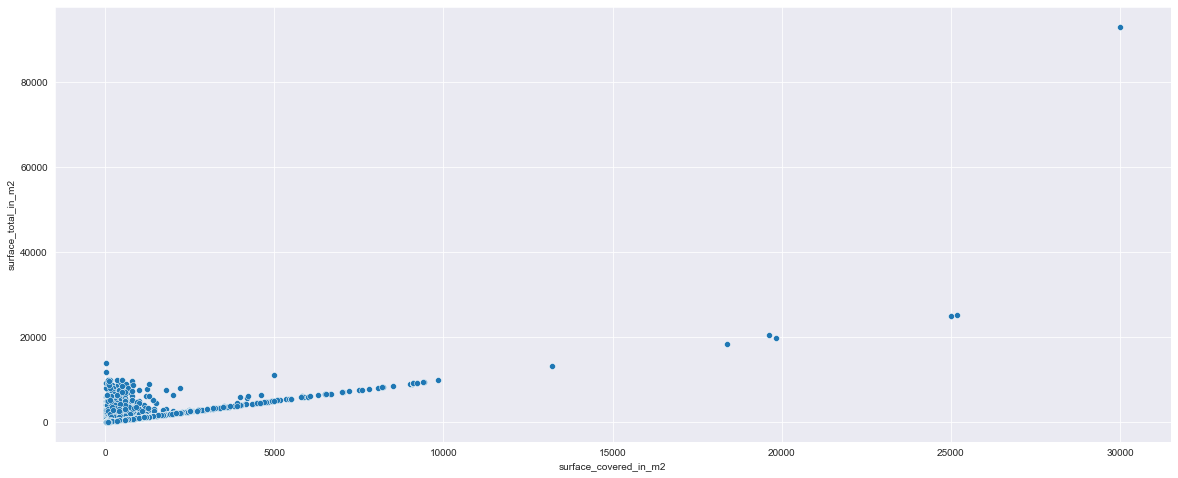

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data, x="surface_covered_in_m2", y='surface_total_in_m2')

plt.show()


<AxesSubplot: xlabel='surface_covered_in_m2'>

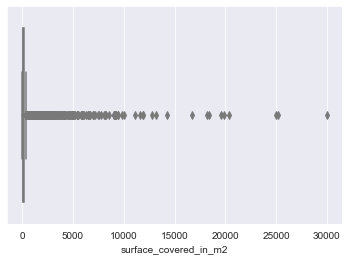

In [14]:
sns.boxplot(x = "surface_covered_in_m2", data=data,
               palette=["lightblue", "lightpink"])

In [15]:
# el tercer cuartil de surface cubierta es 156m2 y para total 206m2
surface_describe = data[['surface_covered_in_m2','surface_total_in_m2']].describe()
surface_describe

,surface_covered_in_m2,surface_total_in_m2
count,102749.000000,100695.000000
mean,137.322485,221.540265
std,347.823183,589.007512
min,11.000000,11.000000
25%,46.000000,50.000000
50%,76.000000,87.000000
75%,156.000000,206.000000
max,30000.000000,93000.000000


In [16]:
# Rango intercuartil
rango_inter_cuartil = (surface_describe.loc['75%','surface_total_in_m2']) - (surface_describe.loc['25%','surface_total_in_m2'])
rango_inter_cuartil 

156.0

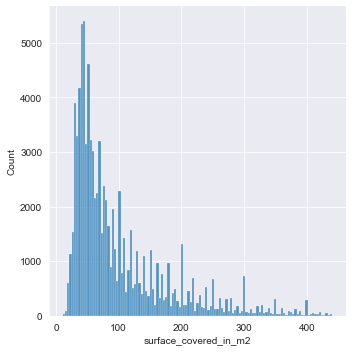

In [17]:
# grafico las propiedades quitando outliers
# el criterio para definirlos es 3q + 1.5 * rango inter cuartil
tercer_cuartil = surface_describe.loc['75%','surface_total_in_m2']

criterio_outlier_superficie = tercer_cuartil + rango_inter_cuartil * 1.5

sns.displot(data=data[data.surface_total_in_m2 <= (criterio_outlier_superficie)],x="surface_covered_in_m2")

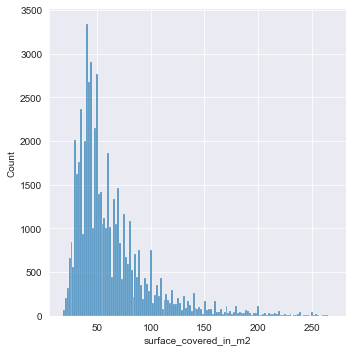

In [18]:
# ahora vamos a observar los outliers de departamentos que es el tipo de propiedad con el que vamos a trabajar
mask_apt = data['property_type'] == 'apartment'
data_apt = data[mask_apt].copy()

surface_describe_apt = data_apt[['surface_covered_in_m2','surface_total_in_m2']].describe()

rango_inter_cuartil_apt = (surface_describe_apt.loc['75%','surface_total_in_m2']) - (surface_describe_apt.loc['25%','surface_total_in_m2'])

tercer_cuartil_apt = surface_describe.loc['75%','surface_total_in_m2']

criterio_outlier_superficie_apt = tercer_cuartil_apt + rango_inter_cuartil_apt * 1.5

sns.displot(data=data_apt[data_apt.surface_total_in_m2 <= (criterio_outlier_superficie_apt)],x="surface_covered_in_m2")

In [19]:
# shape antes de eliminar outliers
data_apt.shape

(65242, 21)

In [20]:
# busco los indices de los departamentos que se consideran outliers por superficie
apt_mayores_a_3q = data_apt.loc[data_apt.surface_total_in_m2 > (criterio_outlier_superficie_apt)].index

data_apt.drop(apt_mayores_a_3q, inplace=True)

In [21]:
# shape despues de eliminar outliers
data_apt.shape

(63993, 21)

# Analisis columna precio

In [22]:
data_apt.columns

Index(['property_type', 'place_with_parent_names', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'rooms', 'description', 'title', 'provincia', 'ciudad_partido',
       'barrio', 'pileta', 'cochera', 'gimnasio', 'seguridad', 'salon',
       'parrilla', 'balcon', 'estrenar'],
      dtype='object')

<AxesSubplot: xlabel='price_aprox_usd'>

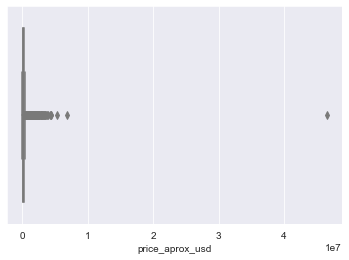

In [23]:
sns.boxplot(x = "price_aprox_usd", data=data_apt,
               palette=["lightblue", "lightpink"])

In [24]:
price_describe = data_apt.price_aprox_usd.describe()
price_describe

count    5.590600e+04
mean     1.749255e+05
std      2.802146e+05
min      1.000000e+03
25%      8.000000e+04
50%      1.180000e+05
75%      1.870000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

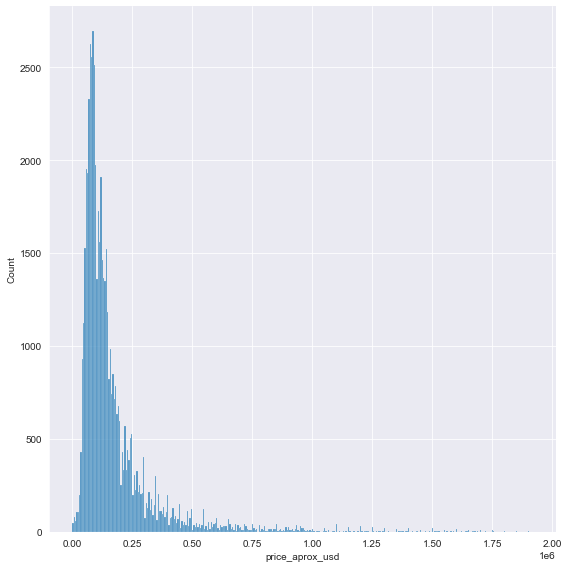

In [25]:
# grafico las propiedades quitando outliers
# hay que elegir el criterio que queremos usar
tercer_cuartil_price = price_describe.loc['75%']

rango_inter_cuartil_price = (price_describe.loc['75%']) - (price_describe.loc['25%'])

criterio_outlier_price = tercer_cuartil_price + rango_inter_cuartil_price * 10

data_apt_sin_outlier_precio = data_apt[data_apt.price_aprox_usd <= 2000000]

sns.displot(data=data_apt_sin_outlier_precio ,x="price_aprox_usd", height=8)

<AxesSubplot: xlabel='price_aprox_usd', ylabel='surface_total_in_m2'>

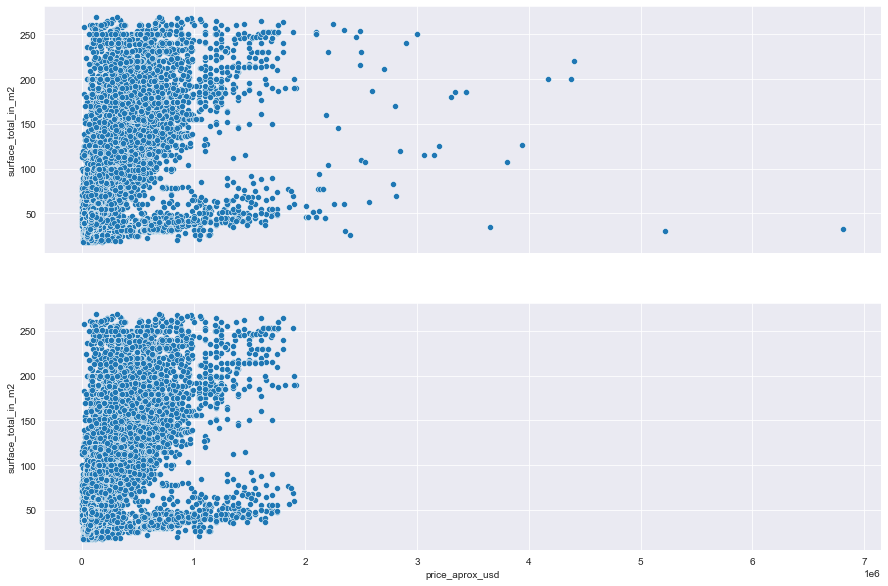

In [26]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10), sharex=True)

sns.scatterplot(data=data_apt, x="price_aprox_usd", y='surface_total_in_m2', ax=axs[0])

sns.scatterplot(data=data_apt_sin_outlier_precio , x="price_aprox_usd", y='surface_total_in_m2', ax=axs[1])

In [27]:
data_apt[~(data_apt.price_aprox_usd <= 2000000) & data_apt.price_aprox_usd.notnull()]

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,...,ciudad_partido,barrio,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
5500,apartment,|Argentina|Capital Federal|Recoleta|,-34.590932,-58.384223,2200000.0,230.0,230.0,4.0,"Semi piso muy luminoso y con regia vista, al f...",Importante edificio Francés Racionalista sobre...,...,Capital Federal,Recoleta,0,1,0,0,0,0,1,0
13320,apartment,|Argentina|Capital Federal|Palermo|Palermo Chico|,-34.578925,-58.401399,2700000.0,211.0,200.0,4.0,CONTACTO: ROMINA TACCARI 15 CONTACTO: MARTIN ...,Le Parc Alcorta - Piso de 211 m² con 2 Cocheras,...,Capital Federal,Palermo,0,1,0,0,0,0,0,0
14046,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.617719,-58.362056,2350000.0,255.0,188.0,5.0,Exclusivo departamento en torre premium.Se acc...,SLS LUX PUERTO MADERO Torre 2 Unidades D 02,...,Capital Federal,Puerto Madero,1,1,1,0,1,1,1,0
16238,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.618153,-58.362615,2600000.0,187.0,187.0,4.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Puerto Madero,...,Capital Federal,Puerto Madero,1,1,1,0,1,1,1,0
23048,apartment,|Argentina|Córdoba|Córdoba|,-31.426810,-64.191007,2500000.0,110.0,110.0,3.0,Departamento en Venta en Cordoba,Nva Cba - Se Vende Departamento 3 dormit,...,Córdoba,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82223,apartment,|Argentina|Capital Federal|Belgrano|,-34.553108,-58.439083,2100000.0,250.0,220.0,NaN,Alquiler espectacular en FORUM!!!3 dormitorios...,Forum Alcorta! Amenities de maximo nivel. Vis...,...,Capital Federal,Belgrano,1,1,0,0,1,1,0,0
84460,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,-34.750000,-58.250000,2200500.0,104.0,98.0,4.0,"El departamento cuenta con 4 ambientes, con 3 ...",4 Ambientes en Quilmes departamentos de pozo,...,Quilmes,Quilmes,1,1,0,1,0,0,0,0
101378,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.603174,-58.364637,2500000.0,230.0,230.0,NaN,Madero Center. departamento dos dormitorios e...,"Departamento de tres ambientes superficie 230,...",...,Capital Federal,Puerto Madero,0,1,0,0,0,0,0,0
104559,apartment,|Argentina|Capital Federal|Belgrano|,-34.562700,-58.458290,2900000.0,240.0,200.0,NaN,"Departamento 240m² con Cloaca, Capital Federal...",Departamento - Belgrano,...,Capital Federal,Belgrano,0,0,0,0,0,0,0,0


In [28]:
data_apt[~(data_apt.price_aprox_usd <= 2000000) & data_apt.price_aprox_usd.notnull()].describe().round(2)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
count,69.00,69.00,71.00,69.00,69.00,64.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00
mean,-33.60,-59.65,3260629.30,120.29,102.78,3.39,0.31,0.75,0.13,0.17,0.21,0.15,0.61,0.01
std,1.99,1.96,5279109.88,79.62,71.62,1.15,0.47,0.44,0.34,0.38,0.41,0.36,0.49,0.12
min,-34.75,-65.42,2003000.00,26.00,26.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-34.58,-60.64,2100000.00,46.00,42.00,3.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00
50%,-34.55,-58.56,2347200.00,94.00,77.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,-32.95,-58.44,2875000.00,187.00,135.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
max,-24.79,-58.25,46545445.00,262.00,262.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [29]:
data_apt[~(data_apt.price_aprox_usd <= 2000000) & data_apt.price_aprox_usd.notnull()].provincia.value_counts()

Capital Federal             22
Bs.As. G.B.A. Zona Norte    22
Santa Fe                    17
Córdoba                      4
Salta                        2
Bs.As. G.B.A. Zona Oeste     2
Tucumán                      1
Bs.As. G.B.A. Zona Sur       1
Name: provincia, dtype: int64

In [30]:
# veo el resumen estadistico de los departamentos de buenos aires considerados outliers
data_apt[~(data_apt.price_aprox_usd <= 2000000) & data_apt.price_aprox_usd.notnull() & (data_apt.provincia == 'Capital Federal') ].describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
count,22.000000,22.000000,2.200000e+01,21.000000,21.000000,15.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,-34.598758,-58.410446,4.892498e+06,183.190476,168.571429,3.333333,0.454545,0.590909,0.181818,0.045455,0.454545,0.363636,0.272727,0.0
std,0.029237,0.032218,9.377277e+06,93.141623,86.432385,1.632993,0.509647,0.503236,0.394771,0.213201,0.509647,0.492366,0.455842,0.0
min,-34.633330,-58.467658,2.003000e+06,30.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-34.620545,-58.437080,2.212500e+06,69.000000,61.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-34.610200,-58.416670,2.495000e+06,230.000000,200.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,-34.578095,-58.382246,2.975000e+06,250.000000,230.000000,4.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.750000,0.0
max,-34.553013,-58.362056,4.654544e+07,262.000000,262.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [31]:
data_apt[~(data_apt.price_aprox_usd <= 2000000) & data_apt.price_aprox_usd.notnull() & (data_apt.provincia == 'Capital Federal') ]

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,...,ciudad_partido,barrio,pileta,cochera,gimnasio,seguridad,salon,parrilla,balcon,estrenar
5500,apartment,|Argentina|Capital Federal|Recoleta|,-34.590932,-58.384223,2200000.0,230.0,230.0,4.0,"Semi piso muy luminoso y con regia vista, al f...",Importante edificio Francés Racionalista sobre...,...,Capital Federal,Recoleta,0,1,0,0,0,0,1,0
13320,apartment,|Argentina|Capital Federal|Palermo|Palermo Chico|,-34.578925,-58.401399,2700000.0,211.0,200.0,4.0,CONTACTO: ROMINA TACCARI 15 CONTACTO: MARTIN ...,Le Parc Alcorta - Piso de 211 m² con 2 Cocheras,...,Capital Federal,Palermo,0,1,0,0,0,0,0,0
14046,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.617719,-58.362056,2350000.0,255.0,188.0,5.0,Exclusivo departamento en torre premium.Se acc...,SLS LUX PUERTO MADERO Torre 2 Unidades D 02,...,Capital Federal,Puerto Madero,1,1,1,0,1,1,1,0
16238,apartment,|Argentina|Capital Federal|Puerto Madero|,-34.618153,-58.362615,2600000.0,187.0,187.0,4.0,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Puerto Madero,...,Capital Federal,Puerto Madero,1,1,1,0,1,1,1,0
24548,apartment,|Argentina|Capital Federal|San Telmo|,-34.621342,-58.374185,46545445.0,NaN,NaN,3.0,dsdffhghvcvbcdfdfghdfhghkjhkhjklhjkfgvghfghnfg...,Departamento venta,...,Capital Federal,San Telmo,0,0,0,0,0,0,0,0
24997,apartment,|Argentina|Capital Federal|Caballito|,-34.616629,-58.431071,4400000.0,220.0,200.0,5.0,Excelente piso 220 m2 Palier privado. Living y...,Excelente piso 220m2 c/ dep. 2 cocheras fijas.,...,Capital Federal,Caballito,0,1,0,0,0,0,1,0
25113,apartment,|Argentina|Capital Federal|Boedo|,-34.626657,-58.424113,2003000.0,58.0,50.0,2.0,Venta desde el pozo en pesos - ltimas unidades...,VENDIDO BOEDO 2 AMBIENTES VENTA EN PESOS DESD...,...,Capital Federal,Boedo,0,0,0,0,1,0,0,0
25853,apartment,|Argentina|Capital Federal|Boedo|,-34.633330,-58.416670,2356000.0,30.0,30.0,1.0,bf221- INCREIBLE FORMA DE PAGO- ANT Y CUOTAS D...,bf221- INCREIBLE FORMA DE PAGO- ANT Y CUOTAS D...,...,Capital Federal,Boedo,1,0,0,0,1,1,0,0
26037,apartment,|Argentina|Capital Federal|Boedo|,-34.633330,-58.416670,5214782.0,30.0,30.0,1.0,lan840- DEPTO FINANCIACION DIRECTA EN PESOSAnt...,lan840- DEPTO FINANCIACION DIRECTA EN PESOS,...,Capital Federal,Boedo,0,0,0,0,1,1,0,0
26193,apartment,|Argentina|Capital Federal|Boedo|,-34.633330,-58.416670,3657014.0,35.0,35.0,2.0,fac030- Depto anticipo en 10 meses y saldo en ...,fac030- Depto anticipo en 10 meses y saldo en ...,...,Capital Federal,Boedo,1,0,0,0,0,0,0,0


# Analisis columnas rooms

In [32]:
data_apt.isnull().sum()

property_type                  0
place_with_parent_names        0
lat                         3577
lon                         3577
price_aprox_usd             8087
surface_total_in_m2         6015
surface_covered_in_m2       6022
rooms                      23920
description                    2
title                          0
provincia                      0
ciudad_partido              2164
barrio                     20927
pileta                         0
cochera                        0
gimnasio                       0
seguridad                      0
salon                          0
parrilla                       0
balcon                         0
estrenar                       0
dtype: int64

# Filtramos para quedarnos con los registros que pertenencen al AMBA o la provincia de BS AS


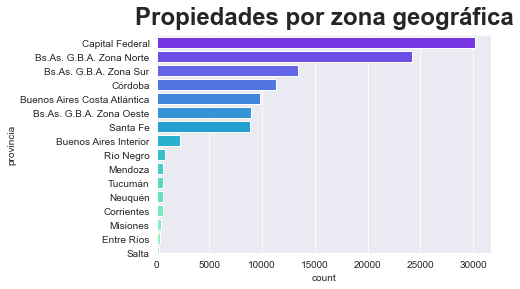

In [33]:
g = sns.countplot(data=data, y="provincia",palette="rainbow" , order = data['provincia'].value_counts().index);
g.axes.set_ylim(15)
g.set_title('Propiedades por zona geográfica',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize":(12, 6)})

In [34]:
bsas_mask =(data_apt.provincia.str.contains('Bs.As.')) | (data_apt.provincia.str.contains('Capital')) | (data_apt.provincia.str.contains('Buenos Aires'))
data_bsas_apt = data_apt[bsas_mask].copy()

In [35]:
(f'El nuevo dataset contiene {data_bsas_apt.shape[0]} filas, y {data_bsas_apt.shape[1]} columnas')

'El nuevo dataset contiene 49289 filas, y 21 columnas'

In [36]:
data_bsas_apt.provincia.value_counts()

Capital Federal                 24512
Bs.As. G.B.A. Zona Norte         9491
Buenos Aires Costa Atlántica     6260
Bs.As. G.B.A. Zona Sur           5001
Bs.As. G.B.A. Zona Oeste         3230
Buenos Aires Interior             795
Name: provincia, dtype: int64

In [37]:
data_bsas_apt.isnull().sum()

property_type                  0
place_with_parent_names        0
lat                         3530
lon                         3530
price_aprox_usd             3609
surface_total_in_m2         2949
surface_covered_in_m2       2979
rooms                      13764
description                    1
title                          0
provincia                      0
ciudad_partido               127
barrio                      6451
pileta                         0
cochera                        0
gimnasio                       0
seguridad                      0
salon                          0
parrilla                       0
balcon                         0
estrenar                       0
dtype: int64

In [38]:
data_bsas_apt.shape

(49289, 21)

In [39]:
bsas_sin_nas = data_bsas_apt[data_bsas_apt.surface_covered_in_m2.notnull() & data_bsas_apt.surface_total_in_m2.notnull() & data_bsas_apt.price_aprox_usd.notnull()].copy()

In [40]:
bsas_sin_nas.shape

(43235, 21)

In [41]:
bsas_sin_nas.columns

Index(['property_type', 'place_with_parent_names', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'rooms', 'description', 'title', 'provincia', 'ciudad_partido',
       'barrio', 'pileta', 'cochera', 'gimnasio', 'seguridad', 'salon',
       'parrilla', 'balcon', 'estrenar'],
      dtype='object')

# Modelos

Text(0.5, 1.0, 'Correlación variables')

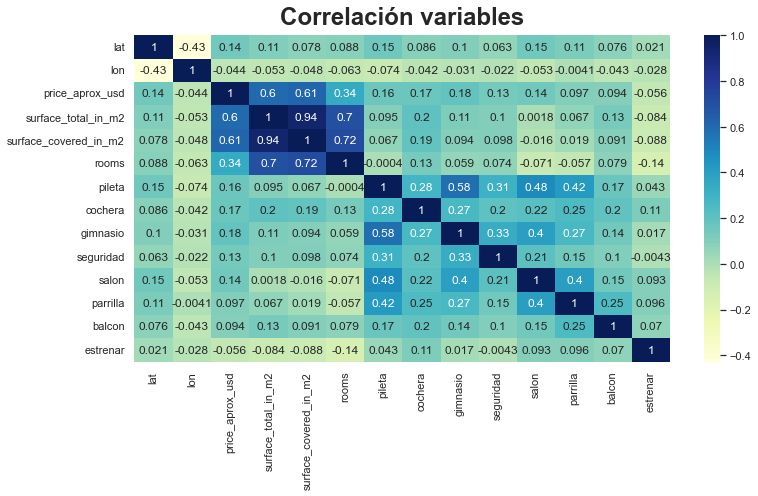

In [42]:
i = sns.heatmap(bsas_sin_nas.corr(),annot=True, cmap="YlGnBu")
i.set_title('Correlación variables', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')

Seleccionamos la variable predictora y la objetivo.
X = df[["RM"]]
y = targets["MEDV"]

Importamos, Instanciamos, Fiteamos, etc..

Instanciamos el modelo.
lm = linear_model.LinearRegression()

Fiteamos el modelo sobre los vectores X e y.
model = lm.fit(X, y)

Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lm.predict(X)

Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)

imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', model.score(X, y))

*Generamos una función que resume los coeficientes, el intercepto y el R2*
*"model" = objeto con el modelo*
**"X" = matrix de variables independientes*

def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
    return(a)

## Lineal simple entre surface y price

<AxesSubplot: xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

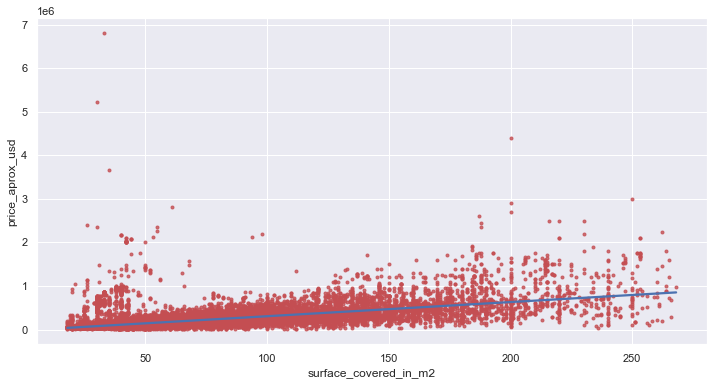

In [43]:
sns.regplot(data = bsas_sin_nas, x = "surface_covered_in_m2", y = "price_aprox_usd", order=1, ci=None, scatter_kws={'color':'r', 's':9})


In [44]:
# elegimos clase e instanciamos el modelo
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

# preparamos X e y 
X = bsas_sin_nas[['surface_covered_in_m2']]
y = bsas_sin_nas[['price_aprox_usd']]

# Corrobaros la shape y el tipo de cada una
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (43235, 1)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (43235, 1)
Type y: <class 'pandas.core.frame.DataFrame'>


In [45]:
# separamos en train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [46]:
# ajustar el modelo a los datos train
model.fit(Xtrain,ytrain)

LinearRegression()

In [47]:
print(f'La pendiente de la recta es: {model.coef_}')
print(f'La ordenada al origen es: {model.intercept_}')
print(f'El R2 es: {model.score(X,y)}')

La pendiente de la recta es: [[3276.67644075]]
La ordenada al origen es: [-21400.54719574]
El R2 es: 0.377373818906094


In [48]:
# predecir etiquetas
test = 200
test_sklearn = np.array(test).reshape(-1,1)
model.predict(test_sklearn)

c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[633934.74095518]])

In [49]:
ypred = model.predict(Xtest)
ypred

array([[185030.0685718 ],
       [293160.3911167 ],
       [348863.89060953],
       ...,
       [240733.56806463],
       [185030.0685718 ],
       [103113.15755293]])

In [50]:
# evaluar la performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 72301.56
MSE: 29738271155.72
RMSE: 172447.88
R2: 0.31


## Regresion multiple con superficie total y cubierta

In [51]:
# elegimos clase e instanciamos el modelo
from sklearn.linear_model import LinearRegression

rl_multiple = LinearRegression(fit_intercept=True)

In [52]:

# preparamos X e y 
X = bsas_sin_nas[['surface_total_in_m2','surface_covered_in_m2']]
y = bsas_sin_nas[['price_aprox_usd']]

# Corrobaros la shape y el tipo de cada una
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (43235, 2)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (43235, 1)
Type y: <class 'pandas.core.frame.DataFrame'>


In [53]:
# separamos en train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [54]:
# ajustar el modelo a los datos train
rl_multiple.fit(Xtrain,ytrain)

LinearRegression()

In [55]:
print(f'La pendiente de la recta es: {rl_multiple.coef_}')
print(f'La ordenada al origen es: {rl_multiple.intercept_}')
print(f'El R2 es: {rl_multiple.score(X,y)}')

La pendiente de la recta es: [[ 949.31941904 2260.16478053]]
La ordenada al origen es: [-23622.17854061]
El R2 es: 0.38310751753949723


In [56]:
# predecir etiquetas
y_pred = rl_multiple.predict(Xtest)
y_pred

array([[178575.32603225],
       [322461.08137945],
       [339049.53601071],
       ...,
       [243579.07103431],
       [183321.92312743],
       [ 98338.22104302]])

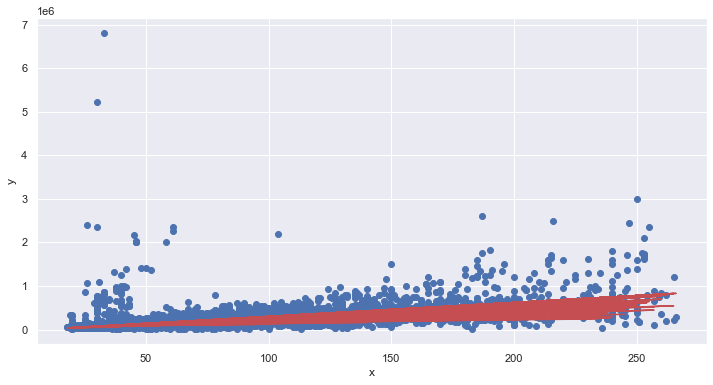

In [57]:
plt.plot(Xtest.surface_total_in_m2, y_pred, 'r')
plt.scatter(Xtest.surface_total_in_m2,ytest)
plt.xlabel('x');
plt.ylabel('y');

In [58]:
# evaluar la performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 72301.56
MSE: 29738271155.72
RMSE: 172447.88
R2: 0.31


## catgorica rooms 



In [59]:
dummy_table = pd.get_dummies(bsas_sin_nas['rooms'],prefix = 'rooms')
dummy_table

,rooms_0.0,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0,rooms_12.0,rooms_17.0,rooms_18.0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121215,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121217,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121218,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

## Reg simple con Stats models

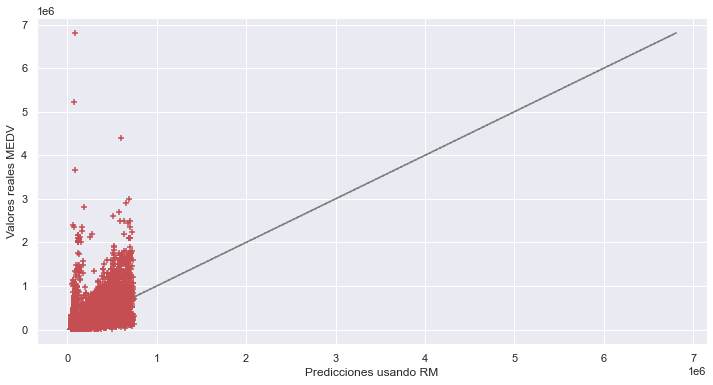

EMC: 23779576882.416817
                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 2.463e+04
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:35:29   Log-Likelihood:            -5.7784e+05
No. Observations:               43235   AIC:                         1.156e+06
Df Residuals:                   43233   BIC:                         1.156e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const     

In [62]:
# Importamos la api.
import statsmodels.api as sm

# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.
X = bsas_sin_nas[["surface_total_in_m2"]]
y = bsas_sin_nas[["price_aprox_usd"]]

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

Gauss Markov


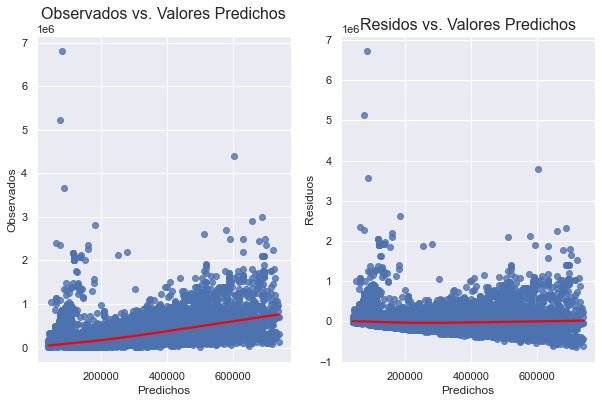

In [63]:
%matplotlib inline
#%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

def linearity_test(model, y):
    '''
    funcion para visualizar e identificar supuestos de linealidad sobre la regression lineal
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observados vs. Valores Predichos', fontsize=16)
    ax[0].set(xlabel='Predichos', ylabel='Observados')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residos vs. Valores Predichos', fontsize=16)
    ax[1].set(xlabel='Predichos', ylabel='Residuos')
    
linearity_test(model, y)    